# Compare and plot the crime rate trend of cities vs universities

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
University_data=pd.read_csv('Data_University/full_data_final.csv',delimiter=',',header=0)

In [3]:
University_dataframe=pd.DataFrame(University_data)
University_dataframe

,Unnamed: 0,Survey year,Unitid,Institution name,Campus ID,Campus Name,Institution Size,Murder/Non-negligent manslaughter,Negligent manslaughter,Sex offenses - Forcible,...,Incest,Statutory rape,Robbery,Aggravated assault,Burglary,Motor vehicle theft,Arson,Location,Hate_Crimes,There are no data to download.
0,0,2001.0,164988.0,Boston University,1.0,Boston University Charles River Campus,27756.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Noncampus,0.0,NaN
1,1,2002.0,164988.0,Boston University,1.0,Boston University Charles River Campus,28982.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noncampus,0.0,NaN
2,2,2003.0,164988.0,Boston University,1.0,Boston University Charles River Campus,29049.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,Noncampus,0.0,NaN
3,3,2004.0,164988.0,Boston University,1.0,Boston University Charles River Campus,29596.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,Noncampus,0.0,NaN
4,4,2005.0,164988.0,Boston University,1.0,Boston University Charles River Campus,30957.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Noncampus,0.0,NaN
5,5,2006.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31574.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,Noncampus,0.0,NaN
6,6,2007.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32053.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,10.0,0.0,0.0,Noncampus,0.0,NaN
7,7,2008.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31766.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,4.0,0.0,0.0,Noncampus,0.0,NaN
8,8,2009.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31960.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,Noncampus,0.0,NaN
9,9,2010.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32727.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,Noncampus,0.0,NaN


## Slice the university crime file 

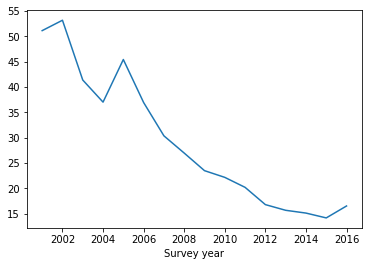

In [4]:
University_byyear=University_dataframe.groupby(['Survey year']).mean()
University_byyear['Total_Crime']=University_byyear[['Murder/Non-negligent manslaughter','Negligent manslaughter',
'Sex offenses - Forcible','Rape','Fondling','Sex offenses - Non-forcible','Incest','Statutory rape','Robbery',
'Aggravated assault','Burglary','Motor vehicle theft','Arson','Hate_Crimes']].sum(axis=1)
university_rate=pd.DataFrame(University_byyear['Total_Crime'])
University_byyear['Total_Crime'].plot.line()

## Read in city crime file

In [5]:
city_rate=pd.read_csv('Data_City/city_plot.csv',delimiter=',',header=None)
city_rate=city_rate.rename(index=str, columns={0: 'Survey year',1:'City Crime Rate'})
city_rate

,Survey year,City Crime Rate
0,2002,81.206389
1,2003,81.135139
2,2004,77.491181
3,2005,75.249306
4,2006,72.266875
5,2007,70.338889
6,2008,68.138889
7,2009,63.475972
8,2010,60.562083
9,2011,58.406042


## Merge two files

In [6]:
crime_rate_compare=city_rate.merge(university_rate,on='Survey year')
crime_rate_compare=crime_rate_compare.rename(index=str,columns={'Total_Crime':'University Crime Rate'})
crime_rate_compare

,Survey year,City Crime Rate,University Crime Rate
0,2002,81.206389,53.162595
1,2003,81.135139,41.382266
2,2004,77.491181,37.024631
3,2005,75.249306,45.421569
4,2006,72.266875,36.944444
5,2007,70.338889,30.378995
6,2008,68.138889,26.981818
7,2009,63.475972,23.515284
8,2010,60.562083,22.192982
9,2011,58.406042,20.224900


## plot the line chart

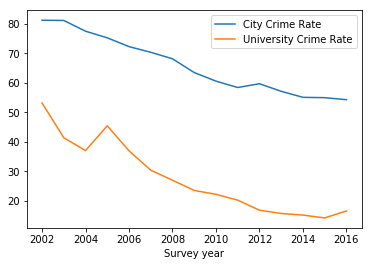

In [7]:
crime_rate_compare.plot.line(x='Survey year')